# Read the text file

In [1]:
names = open("names.txt").read().splitlines()

In [2]:
names

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn',
 'abigail',
 'emily',
 'elizabeth',
 'mila',
 'ella',
 'avery',
 'sofia',
 'camila',
 'aria',
 'scarlett',
 'victoria',
 'madison',
 'luna',
 'grace',
 'chloe',
 'penelope',
 'layla',
 'riley',
 'zoey',
 'nora',
 'lily',
 'eleanor',
 'hannah',
 'lillian',
 'addison',
 'aubrey',
 'ellie',
 'stella',
 'natalie',
 'zoe',
 'leah',
 'hazel',
 'violet',
 'aurora',
 'savannah',
 'audrey',
 'brooklyn',
 'bella',
 'claire',
 'skylar',
 'lucy',
 'paisley',
 'everly',
 'anna',
 'caroline',
 'nova',
 'genesis',
 'emilia',
 'kennedy',
 'samantha',
 'maya',
 'willow',
 'kinsley',
 'naomi',
 'aaliyah',
 'elena',
 'sarah',
 'ariana',
 'allison',
 'gabriella',
 'alice',
 'madelyn',
 'cora',
 'ruby',
 'eva',
 'serenity',
 'autumn',
 'adeline',
 'hailey',
 'gianna',
 'valentina',
 'isla',
 'eliana',
 'quinn',
 'nevaeh',
 'ivy',
 'sadie',
 'piper',
 'lydia',
 'alexa',
 'josephine',
 'emery',
 'julia'

- We have number of names.
- We will make a bigram model for character level prediction.


# Step by Step Process

- Add boundary symbols
- Generate bigrams
- Count bigram occurrences
- Convert counts to probabilities -> Conditional Probability -> P(w_n​∣w_n−1​)

In [3]:
len(names)

32033

## 1. Add Boundaries

In [4]:
names[0]

'emma'

In [5]:
from collections import Counter

In [7]:
names[0]

'emma'

## 2. Generate Bigrams and Calculate bigram occurances

In [8]:
bigram = Counter()
for name in names[:1]:
    chs = ['<s>'] + list(name) + ['<e>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram[(ch1, ch2)] += 1

bigram

Counter({('<s>', 'e'): 1,
         ('e', 'm'): 1,
         ('m', 'm'): 1,
         ('m', 'a'): 1,
         ('a', '<e>'): 1})

In [9]:
bigram = Counter()
for name in names:
    chs = ['<s>'] + list(name) + ['<e>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram[(ch1, ch2)] += 1

bigram

Counter({('n', '<e>'): 6763,
         ('a', '<e>'): 6640,
         ('a', 'n'): 5438,
         ('<s>', 'a'): 4410,
         ('e', '<e>'): 3983,
         ('a', 'r'): 3264,
         ('e', 'l'): 3248,
         ('r', 'i'): 3033,
         ('n', 'a'): 2977,
         ('<s>', 'k'): 2963,
         ('l', 'e'): 2921,
         ('e', 'n'): 2675,
         ('l', 'a'): 2623,
         ('m', 'a'): 2590,
         ('<s>', 'm'): 2538,
         ('a', 'l'): 2528,
         ('i', '<e>'): 2489,
         ('l', 'i'): 2480,
         ('i', 'a'): 2445,
         ('<s>', 'j'): 2422,
         ('o', 'n'): 2411,
         ('h', '<e>'): 2409,
         ('r', 'a'): 2356,
         ('a', 'h'): 2332,
         ('h', 'a'): 2244,
         ('y', 'a'): 2143,
         ('i', 'n'): 2126,
         ('<s>', 's'): 2055,
         ('a', 'y'): 2050,
         ('y', '<e>'): 2007,
         ('e', 'r'): 1958,
         ('n', 'n'): 1906,
         ('y', 'n'): 1826,
         ('k', 'a'): 1731,
         ('n', 'i'): 1725,
         ('r', 'e'): 1697,
      

## 3. Create a Matrix of Count of Bigram

- Create an empty matrix of size 28 x 28 -> 26 charachters + 2 special characters
- For this purpose we will have to map alphabets(characters) to numbers (index) -> stoi
- To retrieve the character again, we will map index to character -> itos

In [26]:
chars = sorted(list(set(''.join(names))))
chars, len(chars)

(['a',
  'b',
  'c',
  'd',
  'e',
  'f',
  'g',
  'h',
  'i',
  'j',
  'k',
  'l',
  'm',
  'n',
  'o',
  'p',
  'q',
  'r',
  's',
  't',
  'u',
  'v',
  'w',
  'x',
  'y',
  'z'],
 26)

In [30]:
stoi = {ch:ind+1 for ind,ch in enumerate(chars)}
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [40]:
itos = {i:s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [32]:
stoi['.'] = 0

### Intialize matrix

In [42]:
import torch
import matplotlib.pyplot as plt

In [35]:
N = torch.zeros(28, 28, dtype=torch.int32)

In [36]:
bigram_counts = Counter()
for name in names:
    chs = ['.'] + list(name) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1
        

In [38]:
N[:3][:3]

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929,    0],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435,    0],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0,    0]], dtype=torch.int32)

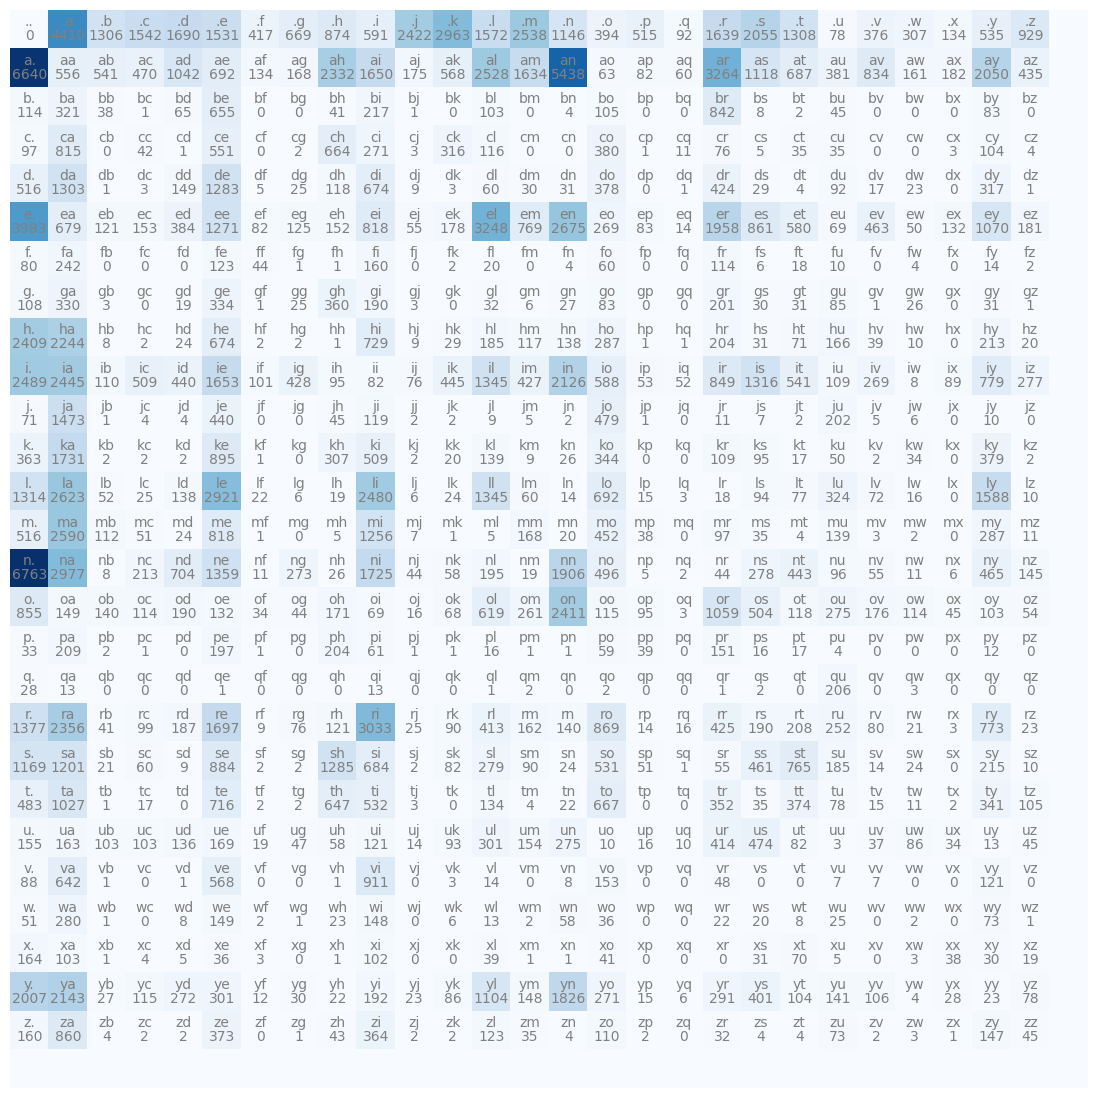

In [46]:
plt.figure(figsize=(14,14))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

-----------------------

In [47]:
g = torch.Generator().manual_seed(2147483647)

In [48]:
p = torch.rand(3, generator=g)
p


tensor([0.7081, 0.3542, 0.1054])

In [50]:
i = torch.multinomial(p, num_samples=10, replacement=True, generator=g)
i

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0])

In [51]:
p = N[0].float()
p = p / p.sum()
p


tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290,
        0.0000])

In [52]:
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'r'

In [54]:
P = (N+1).float() / N.sum(1, keepdim=True) # row-wise normalization
P[:3, :3]

tensor([[3.1218e-05, 1.3770e-01, 4.0802e-02],
        [1.9599e-01, 1.6438e-02, 1.5995e-02],
        [4.3478e-02, 1.2174e-01, 1.4745e-02]])

In [55]:
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    ix = 0  # initial character is the '.' character
    out = []
    while True:
        # p = N[ix].float()
        # p = p / p.sum()
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        if ix == 0:
            break
        out.append(itos[ix])
    print(''.join(out))

cava
ayamaijowy
aianeta
rl
miryndardyrioma
kiinninaswila
en
ahlanyanlen
tav
sissth


In [57]:
log_likelihood = 0.0
n = 0

for w in names:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}') #avg log likelihood per bigram

log_likelihood=tensor(-559322.6875)
nll=tensor(559322.6875)
2.4515998363494873
